**Model Selection Considerations**

| Data Assumptions | Assumptions Test |
|------|------|
|   Univariate Timeseries | N/A|
|   Normal Distribution | p-test, visual inspection of histograms, q-q plots, box plots |
|   Regular Time Series | domain knowledge/put a groupby on it|
|   No autocorrelation  | domain knowledge/visual inspection of AFC plot or lag plot|
| errors iid| 

- The inclusion of lagged terms as regressors does not create a collinearity problem (basically means no autocorrelation)
- The error term is a white noise process and is stationary (A white noise process is a random process of random variables that are uncorrelated, have mean zero, and a finite variance. In other words, the noise is true noise)
- Your errors are not correlated with each other (Correlation in the error terms suggests that there is additional information in the data that has not been exploited in the current model). The errors should be IID (independent and identically distributed)
- The other linear regression assumptions apply:
    1. Linearity: The relationship between X and the mean of Y is linear.
    2. Homoscedasticity: The variance of residual is the same for any value of X.
    3. Independence: Observations are independent of each other.
    4. Normality: For any fixed value of X, Y is normally distributed.


Data Preperation Steps:
- check that error term is a white noise process
- remove trend
- perform test to check that trend has been removed
- remove seasonality
- perform test to check that seasonality has been removed
- verify that there isn't autocorrelation


*Thoughts: it could be considered risky/irresponsible? to include linear regression for time series forecasting. On the other hand, we could just have the expectation that the user will do their due dilligence?*

*Or alternatively, linreg could be applied very frequently with small datasets to produce short forecasts...but that's pretty hacky statistically speaking...*


In [322]:
import pandas as pd
import matplotlib.pyplot as plt 
from pmdarima import model_selection 
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

In [323]:
df = pd.read_csv('../data/example_wp_log_peyton_manning.csv')
df['x'] = df.index
df.head()


,ds,y,x
0,2007-12-10,9.590761,0
1,2007-12-11,8.519590,1
2,2007-12-12,8.183677,2
3,2007-12-13,8.072467,3
4,2007-12-14,7.893572,4


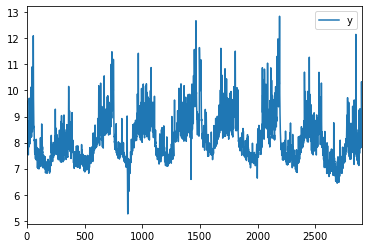

In [324]:
df[['ds','y']].plot()

In [325]:
ts = 2000
train,test = train_test_split(df, test_size=0.2)

In [326]:
x = train['x'].values.reshape(-1,1)
y = train['y'].values.reshape(-1,1)
x_test = test['x'].values.reshape(-1,1)
y_test = test['y'].values.reshape(-1,1)
print(f"length y: {y.shape} \nlength x: {x.shape}")
print(f"length y_test: {y_test.shape} \nlength x_test: {x_test.shape}")

length y: (2324, 1) 
length x: (2324, 1)
length y_test: (581, 1) 
length x_test: (581, 1)


In [327]:
regressor = LinearRegression()
regressor.fit(x,y)
Y_pred = regressor.predict(x_test)  # make predictions

**Output**

In [351]:
Y_pred[0:5]

array([[8.11619099],
       [8.1991143 ],
       [8.14665008],
       [8.0461351 ],
       [8.14590414]])

In [328]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[8.0409757]
[[6.2161397e-05]]


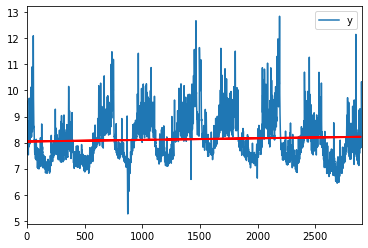

In [331]:
df[['ds','y']].plot()
plt.plot(x_test, Y_pred, color='red', linewidth=2)

In [334]:
df_compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))
df_compare.head()

Root Mean Squared Error: 0.8909250863752904


,Actual,Predicted
0,7.237059,8.116191
1,8.396606,8.199114
2,8.510974,8.146650
3,7.819636,8.046135
4,9.807252,8.145904
